In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# Parameters
N           = 10000
rho_grid_N  = 5000
mu_grid_N   = 1000

# 3(b) - Simulate and Plot $\pi$($\mu$)

In [3]:
def get_T_dist(mu, rho):
    rcov    = np.array([[1.0, rho],[rho, 1.0]])
    Rs      = np.random.multivariate_normal(np.zeros(2), rcov, N)
    Rrf,Rfs = Rs[:,0],Rs[:,1]
    Rmu     = (Rrf/(mu+Rfs))
    T_num   = Rmu*(mu + Rfs)
    T_denom = np.sqrt(1. - 2*rho*Rmu + Rmu**2)
    with np.errstate(divide='ignore'):
        T = T_num/T_denom
    return T

def get_reject_prob(mu, rho, alpha):
    T           = get_T_dist(mu, rho)
    critval     = st.norm.ppf(1-(alpha/2))
    reject_prob = np.mean(np.where(abs(T) >= critval, 1., 0.))
    return reject_prob
get_reject_prob = np.vectorize(get_reject_prob)

def get_max_rejection_prob(mu, alpha):
    rho_grid     = np.linspace(-1.,1.,rho_grid_N)
    reject_probs = get_reject_prob(mu, rho_grid, 0.05)
    max_idx      = np.argmax(reject_probs)
    max_val      = rho_grid[max_idx]
    max_prob     = reject_probs[max_idx]
    return (max_prob,max_val)

def run_simulation(verbose=False):
    mu_grid   = np.linspace(0.0, 8.0, mu_grid_N)
    max_probs = np.zeros(mu_grid_N)
    for i,mu in enumerate(mu_grid):
        max_probs[i] = get_max_rejection_prob(mu, 0.05)[0]
        if verbose:
            if (i+1) % 20 == 0:
                print(f"Finished {i+1} values of mu")
    return mu_grid,max_probs

In [4]:
# This takes a bit - lower simulation sizes to speed it up
mu_grid,max_probs = run_simulation(verbose=True)

Finished 20 values of mu
Finished 40 values of mu
Finished 60 values of mu
Finished 80 values of mu
Finished 100 values of mu
Finished 120 values of mu
Finished 140 values of mu
Finished 160 values of mu
Finished 180 values of mu
Finished 200 values of mu
Finished 220 values of mu
Finished 240 values of mu
Finished 260 values of mu
Finished 280 values of mu
Finished 300 values of mu
Finished 320 values of mu
Finished 340 values of mu
Finished 360 values of mu
Finished 380 values of mu
Finished 400 values of mu
Finished 420 values of mu
Finished 440 values of mu
Finished 460 values of mu
Finished 480 values of mu
Finished 500 values of mu
Finished 520 values of mu
Finished 540 values of mu
Finished 560 values of mu
Finished 580 values of mu
Finished 600 values of mu
Finished 620 values of mu
Finished 640 values of mu
Finished 660 values of mu
Finished 680 values of mu
Finished 700 values of mu
Finished 720 values of mu
Finished 740 values of mu
Finished 760 values of mu
Finished 780 val

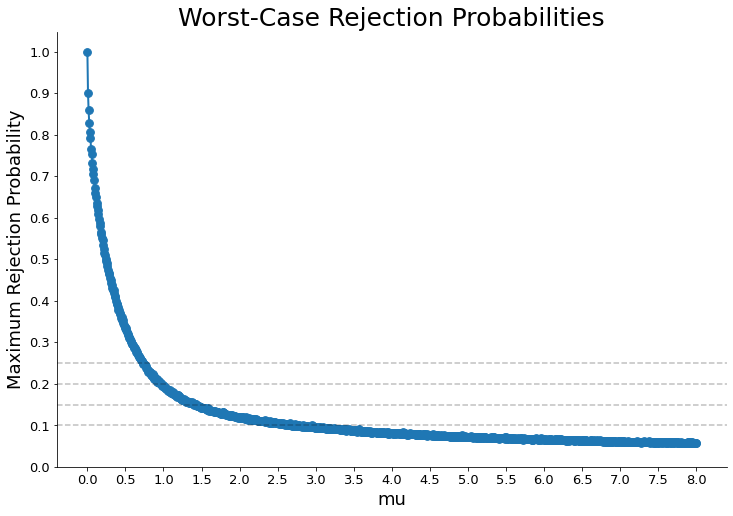

In [8]:
# Formatting stuff
fig,ax = plt.subplots(figsize=(12,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Do plotting
ax.scatter(mu_grid, max_probs, s=60)
ax.plot(mu_grid, max_probs, linewidth=2)
ax.axhline(y=0.1, color='black', linestyle='dashed', alpha=0.25)
ax.axhline(y=0.15, color='black', linestyle='dashed', alpha=0.25)
ax.axhline(y=0.20, color='black', linestyle='dashed', alpha=0.25)
ax.axhline(y=0.25, color='black', linestyle='dashed', alpha=0.25)

# Axis formatting
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xticks(np.arange(0,8.5,0.5))
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xlabel("mu", size=18)
ax.set_ylabel("Maximum Rejection Probability", size=18)

# More formatting
ax.set_title(f"Worst-Case Rejection Probabilities", size=25)
plt.savefig(f"./q3_output/q3b_plot.png")
plt.show()

# 3(c) - Invert to Get $\mu$ for a Given $\alpha$

In [9]:
idx25 = np.argmax(max_probs <= 0.25)
idx20 = np.argmax(max_probs <= 0.20)
idx15 = np.argmax(max_probs <= 0.15)
idx10 = np.argmax(max_probs <= 0.10)

mu25  = mu_grid[idx25]
mu20  = mu_grid[idx20]
mu15  = mu_grid[idx15]
mu10  = mu_grid[idx10]

print(f"Smallest mu such that pi(mu) <= 0.25: {np.round(mu25,4)}")
print(f"Smallest mu such that pi(mu) <= 0.20: {np.round(mu20,4)}")
print(f"Smallest mu such that pi(mu) <= 0.15: {np.round(mu15,4)}")
print(f"Smallest mu such that pi(mu) <= 0.10: {np.round(mu10,4)}")

Smallest mu such that pi(mu) <= 0.25: 0.7287
Smallest mu such that pi(mu) <= 0.20: 0.977
Smallest mu such that pi(mu) <= 0.15: 1.4014
Smallest mu such that pi(mu) <= 0.10: 2.6587


# 3(d) - Get Non-Central $\chi^2(\mu^2)$ Quantiles

In [10]:
alpha = 0.05

print(f"mu^2 for alphabar = 0.25: {np.round(mu25**2,4)}")
print(f"mu^2 for alphabar = 0.20: {np.round(mu20**2,4)}")
print(f"mu^2 for alphabar = 0.15: {np.round(mu15**2,4)}")
print(f"mu^2 for alphabar = 0.10: {np.round(mu10**2,4)}")

chiq25 = st.ncx2.ppf(1-alpha, df=1, nc=mu25**2)
chiq20 = st.ncx2.ppf(1-alpha, df=1, nc=mu20**2)
chiq15 = st.ncx2.ppf(1-alpha, df=1, nc=mu15**2)
chiq10 = st.ncx2.ppf(1-alpha, df=1, nc=mu10**2)
      
print(f"Non-central chi-squared quantile for alphabar = 0.25: {np.round(chiq25,4)}")
print(f"Non-central chi-squared quantile for alphabar = 0.20: {np.round(chiq20,4)}")
print(f"Non-central chi-squared quantile for alphabar = 0.15: {np.round(chiq15,4)}")
print(f"Non-central chi-squared quantile for alphabar = 0.10: {np.round(chiq10,4)}")

mu^2 for alphabar = 0.25: 0.531
mu^2 for alphabar = 0.20: 0.9545
mu^2 for alphabar = 0.15: 1.9639
mu^2 for alphabar = 0.10: 7.0685
Non-central chi-squared quantile for alphabar = 0.25: 5.6771
Non-central chi-squared quantile for alphabar = 0.20: 6.8821
Non-central chi-squared quantile for alphabar = 0.15: 9.2799
Non-central chi-squared quantile for alphabar = 0.10: 18.5202
